In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [3]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

'wget' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [4]:
df = pd.read_csv(r'C:\Users\15010\machine_learning\FuelConsumptionCo2.csv')

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
# select some features
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


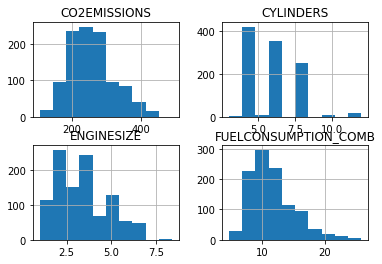

In [7]:
# plot each of these features
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

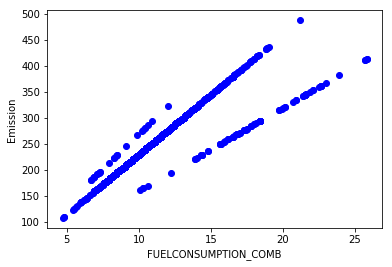

In [8]:
# plot features vs co2 emission
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

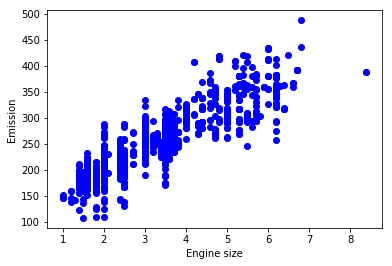

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

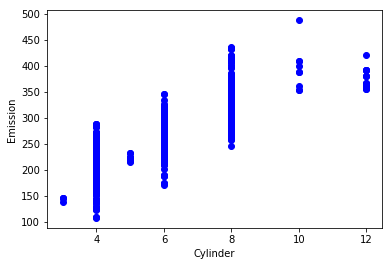

In [10]:
# write your code here
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinder")
plt.ylabel("Emission")
plt.show()

In [11]:
# Create train and test dataset

# create a mask to select random rows
# len(df)                       --- number of rows of df
# np.random.rand(len(df))       --- create an array of random numbers [0,1] with length of len(df) 
# np.random.rand(len(df)) < 0.8 --- create an array of booleans (whether the number < 0.8 or not) with length of len(df) 
msk = (np.random.rand(len(df)) < 0.8)
train = cdf[msk]
test = cdf[~msk]

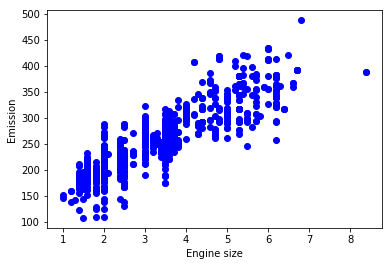

In [12]:
# Train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [13]:
# Use sklearn package to model data.
# numpy.asanyarray() --- convert an array-like input (list, scalar, tuple, etc) into an array
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
print(train_x)

[[2. ]
 [2.4]
 [3.5]
 [3.5]
 [3.5]
 [3.7]
 [3.7]
 [2.4]
 [2.4]
 [3.5]
 [5.9]
 [4.7]
 [4.7]
 [4.7]
 [5.9]
 [2. ]
 [2. ]
 [2. ]
 [2. ]
 [3. ]
 [3. ]
 [3. ]
 [3. ]
 [4. ]
 [3. ]
 [3. ]
 [4. ]
 [6.3]
 [3. ]
 [2. ]
 [2. ]
 [3. ]
 [2. ]
 [3. ]
 [3. ]
 [3. ]
 [4.2]
 [4.2]
 [5.2]
 [4.2]
 [5.2]
 [4.2]
 [4.2]
 [3. ]
 [3. ]
 [3. ]
 [3. ]
 [2. ]
 [2. ]
 [2. ]
 [4. ]
 [6. ]
 [4. ]
 [4. ]
 [6. ]
 [2. ]
 [2. ]
 [2. ]
 [2. ]
 [2. ]
 [2. ]
 [2. ]
 [3. ]
 [3. ]
 [3. ]
 [3. ]
 [2. ]
 [2. ]
 [2. ]
 [3. ]
 [3. ]
 [3. ]
 [2. ]
 [3. ]
 [3. ]
 [3. ]
 [4.4]
 [4.4]
 [3. ]
 [4.4]
 [4.4]
 [3. ]
 [4.4]
 [4.4]
 [6. ]
 [3. ]
 [3. ]
 [3. ]
 [4.4]
 [4.4]
 [4.4]
 [4.4]
 [4.4]
 [4.4]
 [4.4]
 [4.4]
 [2. ]
 [2. ]
 [3. ]
 [3. ]
 [4.4]
 [4.4]
 [4.4]
 [2. ]
 [2. ]
 [3. ]
 [3. ]
 [3.6]
 [1.4]
 [1.4]
 [3.6]
 [3.6]
 [3.6]
 [2.4]
 [2. ]
 [2. ]
 [2. ]
 [2.4]
 [2. ]
 [2. ]
 [2. ]
 [2.5]
 [2. ]
 [3.6]
 [3.6]
 [3.6]
 [3.6]
 [2. ]
 [3.6]
 [3. ]
 [3.6]
 [3. ]
 [3.6]
 [6.2]
 [6.2]
 [6.2]
 [6.2]
 [6.2]
 [6.2]
 [6.2]
 [6.2]
 [3.6]
 [3.6]

In [14]:
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.2682448]]
Intercept:  [125.24984021]


Text(0, 0.5, 'Emission')

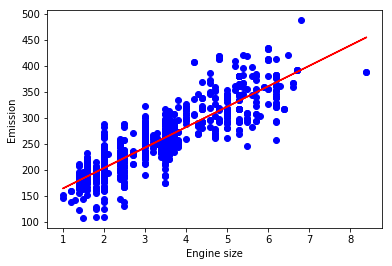

In [15]:
# plot outputs
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [16]:
# evaluation
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 23.05
Residual sum of squares (MSE): 881.02
R2-score: 0.70
